# Jiawen Zhang 

In [1]:
import pandas as pd
import numpy as np

In [2]:
prj2 = pd.read_excel ('~/Desktop/Project2.xlsx',
                          sheet_name = 'WTI_FuturesCurve', parse_date = True, header = 1, usecols = 'A:BS', index_col =[0])

In [3]:
prj2.head()

,FUT_CUR_GEN_TICKER,PX LAST,VOLUME,Term,FUT_CUR_GEN_TICKER.1,PX LAST.1,VOLUME.1,Term.1,FUT_CUR_GEN_TICKER.2,PX LAST.2,...,VOLUME.9,Term.9,FUT_CUR_GEN_TICKER.10,PX LAST.10,VOLUME.10,Term.10,FUT_CUR_GEN_TICKER.11,PX LAST.11,VOLUME.11,Term.11
1,,,,,,,,,,,,,,,,,,,,,
2000-01-31,CLH00,27.64,83938,1.0,CLJ00,26.72,30986,2.0,CLK00,25.97,...,5380,10.0,CLF01,22.14,1354,11.0,CLG01,21.81,848,12.0
2000-02-01,CLH00,28.22,80801,1.0,CLJ00,27.26,33388,2.0,CLK00,26.49,...,8690,10.0,CLF01,22.47,1354,11.0,CLG01,22.12,580,12.0
2000-02-02,CLH00,27.55,100243,1.0,CLJ00,26.67,50618,2.0,CLK00,25.96,...,5921,10.0,CLF01,22.18,771,11.0,CLG01,21.83,28,12.0
2000-02-03,CLH00,28.03,80492,1.0,CLJ00,27.13,38659,2.0,CLK00,26.39,...,3372,10.0,CLF01,22.57,3856,11.0,CLG01,22.21,225,12.0
2000-02-04,CLH00,28.82,67793,1.0,CLJ00,27.82,27438,2.0,CLK00,27.04,...,3458,10.0,CLF01,23.03,281,11.0,CLG01,22.67,106,12.0


In [4]:
end_month = prj2.resample('M').last()

In [5]:
19*12+1 # end_month dataframe should have 229 rows

229

In [6]:
end_month.head()  # has 229 rows, right

,FUT_CUR_GEN_TICKER,PX LAST,VOLUME,Term,FUT_CUR_GEN_TICKER.1,PX LAST.1,VOLUME.1,Term.1,FUT_CUR_GEN_TICKER.2,PX LAST.2,...,VOLUME.9,Term.9,FUT_CUR_GEN_TICKER.10,PX LAST.10,VOLUME.10,Term.10,FUT_CUR_GEN_TICKER.11,PX LAST.11,VOLUME.11,Term.11
1,,,,,,,,,,,,,,,,,,,,,
2000-01-31,CLH00,27.64,83938,1.0,CLJ00,26.72,30986,2.0,CLK00,25.97,...,5380,10.0,CLF01,22.14,1354,11.0,CLG01,21.81,848,12.0
2000-02-29,CLJ00,30.43,53648,1.0,CLK00,28.85,33710,2.0,CLM00,27.68,...,393,10.0,CLG01,23.04,120,11.0,CLH01,22.65,242,12.0
2000-03-31,CLK00,26.90,75364,1.0,CLM00,26.38,35207,2.0,CLN00,26.04,...,11,10.0,CLH01,23.68,17,11.0,CLJ01,23.39,332,12.0
2000-04-30,CLM00,25.74,60558,1.0,CLN00,25.48,26957,2.0,CLQ00,25.15,...,202,10.0,CLJ01,23.08,185,11.0,CLK01,22.85,7,12.0
2000-05-31,CLN00,29.01,92485,1.0,CLQ00,28.42,47089,2.0,CLU00,27.89,...,85,10.0,CLK01,24.58,652,11.0,CLM01,24.21,623,12.0


In [7]:
end_month.iloc[:,2]

1
2000-01-31     83938
2000-02-29     53648
2000-03-31     75364
2000-04-30     60558
2000-05-31     92485
               ...  
2018-09-30    544047
2018-10-31    666487
2018-11-30    796714
2018-12-31    476970
2019-01-31    718650
Freq: M, Name: VOLUME, Length: 229, dtype: int64

In [8]:
end_month.index[2:229]

DatetimeIndex(['2000-03-31', '2000-04-30', '2000-05-31', '2000-06-30',
               '2000-07-31', '2000-08-31', '2000-09-30', '2000-10-31',
               '2000-11-30', '2000-12-31',
               ...
               '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31',
               '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30',
               '2018-12-31', '2019-01-31'],
              dtype='datetime64[ns]', name=1, length=227, freq='M')

In [9]:
def estimate_month_return(Term_number):
    term_col = Term_number*4-3
    exp_col = Term_number*4-7
    mr = (end_month.iloc[:,exp_col])/(end_month.iloc[:,term_col])
    return mr

In [10]:
mon_ret = []
for i in range(1,13):
    element = estimate_month_return(i)
    mon_ret.append(element)
mon_ret  # used for choosing which contracts to long or short 

[1
 2000-01-31    0.789074
 2000-02-29    0.744331
 2000-03-31    0.869517
 2000-04-30    0.887723
 2000-05-31    0.834540
                 ...   
 2018-09-30    0.961775
 2018-10-31    1.005053
 2018-11-30    1.018849
 2018-12-31    1.068047
 2019-01-31    1.017104
 Freq: M, Length: 229, dtype: float64, 1
 2000-01-31    1.034431
 2000-02-29    1.054766
 2000-03-31    1.019712
 2000-04-30    1.010204
 2000-05-31    1.020760
                 ...   
 2018-09-30    1.002601
 2018-10-31    0.998013
 2018-11-30    0.996868
 2018-12-31    0.993220
 2019-01-31    0.995374
 Freq: M, Length: 229, dtype: float64, 1
 2000-01-31    1.028879
 2000-02-29    1.042269
 2000-03-31    1.013057
 2000-04-30    1.013121
 2000-05-31    1.019003
                 ...   
 2018-09-30    1.002332
 2018-10-31    0.997865
 2018-11-30    0.997267
 2018-12-31    0.992188
 2019-01-31    0.995029
 Freq: M, Length: 229, dtype: float64, 1
 2000-01-31    1.025671
 2000-02-29    1.035153
 2000-03-31    1.010870
 2000-04-3

In [11]:
judge = pd.DataFrame(data=mon_ret, index=list(range(1,13)))
judge = judge.drop(labels=1)
#monret_frame = monret_frame.drop([true_return.columns[-1]], axis=1)
judge

1,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,...,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31
2,1.034431,1.054766,1.019712,1.010204,1.020760,1.044009,1.004394,1.028252,1.004233,1.036450,...,1.001314,1.001943,1.023323,1.016709,1.006199,1.002601,0.998013,0.996868,0.993220,0.995374
3,1.028879,1.042269,1.013057,1.013121,1.019003,1.030795,1.004413,1.019949,1.005566,1.022690,...,1.004547,1.005561,1.021715,1.005352,1.004634,1.002332,0.997865,0.997267,0.992188,0.995029
4,1.025671,1.035153,1.010870,1.011665,1.017883,1.023382,1.007037,1.019038,1.006592,1.019161,...,1.007240,1.006504,1.010832,1.004480,1.003780,1.002613,0.997718,0.997469,0.990755,0.994689
5,1.024686,1.028462,1.010989,1.010980,1.017831,1.019696,1.007839,1.018403,1.007973,1.016113,...,1.008794,1.004711,1.009642,1.003897,1.004820,1.002620,0.997723,0.997282,0.991051,0.995261
6,1.022342,1.025641,1.011513,1.011102,1.017000,1.018297,1.008280,1.016706,1.009051,1.015337,...,1.008266,1.004274,1.009296,1.006032,1.004401,1.002766,0.998333,0.998062,0.992178,0.996730
7,1.019401,1.022590,1.011647,1.010386,1.015733,1.017908,1.008732,1.016299,1.009475,1.015576,...,1.008335,1.004138,1.009975,1.005459,1.004273,1.003052,0.999092,0.998839,0.993697,0.998549
8,1.018908,1.019326,1.012195,1.010495,1.014402,1.017122,1.009195,1.015517,1.009911,1.015466,...,1.008559,1.005548,1.009029,1.004723,1.004440,1.003480,0.999849,0.999033,0.994983,1.000181
9,1.017490,1.018425,1.013180,1.010607,1.014613,1.015914,1.009281,1.014696,1.011057,1.015709,...,1.009722,1.006203,1.008057,1.004284,1.004609,1.004615,1.000757,0.999034,0.995837,1.001090
10,1.016896,1.018771,1.012933,1.010720,1.014830,1.015408,1.008580,1.013116,1.011181,1.015959,...,1.009660,1.006555,1.007365,1.004457,1.005231,1.004918,1.001517,0.999228,0.996267,1.001638
11,1.015808,1.017361,1.012247,1.010399,1.015053,1.014487,1.008655,1.012199,1.011307,1.015844,...,1.009596,1.005808,1.006658,1.004942,1.005107,1.004801,1.001976,0.999228,0.996693,1.002188


In [12]:
# the strategy: long the contract with highest return 
#               short the contract with the smallest return
# use the current month's data to make the decision and build the portfolio
# for next month

In [13]:
def true_month_return(Term_number):
    term_col = Term_number*4-3
    exp_col = Term_number*4-7
    true_mr = (end_month.iloc[:,exp_col].shift(-1))/(end_month.iloc[:,term_col])
    return true_mr

In [14]:
true_mon_ret = []
for i in range(1,13):
    element = true_month_return(i)
    true_mon_ret.append(element)

In [15]:
true_return = pd.DataFrame(data=true_mon_ret,index=list(range(1,13)))
true_return = true_return.drop([true_return.columns[-1]], axis=1)
true_return = true_return.drop(labels=1)
true_return  # ps: content in column'2000-01-31' means the return 
             # during 2000-1-31 --- 2000-02-29

1,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,...,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31
2,1.138847,0.932409,0.975739,1.138540,1.143561,0.881144,1.212743,0.957467,1.064800,1.071949,...,1.057037,0.978972,1.108205,0.948937,1.032086,1.055932,0.893923,0.778270,0.888824,1.176509
3,1.110897,0.953035,0.978495,1.130020,1.116171,0.904305,1.184627,0.972451,1.033071,1.065802,...,1.061047,0.981517,1.088969,0.953610,1.031217,1.058074,0.897791,0.779048,0.892446,1.172743
4,1.093207,0.973822,0.976320,1.121883,1.102190,0.921383,1.169630,0.985479,1.016809,1.053849,...,1.064491,0.983156,1.072758,0.958808,1.031059,1.059602,0.902063,0.779401,0.897196,1.167706
5,1.082153,0.990769,0.975667,1.114274,1.096211,0.932965,1.156775,0.997042,1.005648,1.040618,...,1.066163,0.985393,1.066261,0.963736,1.031180,1.061934,0.906496,0.779599,0.903107,1.163435
6,1.075714,1.005128,0.976181,1.106908,1.093313,0.942646,1.145277,1.005680,0.998659,1.029312,...,1.066275,0.988879,1.060592,0.968918,1.032423,1.063820,0.911077,0.780421,0.909496,1.159831
7,1.069169,1.016136,0.976707,1.099709,1.090560,0.951648,1.136295,1.012903,0.992893,1.021115,...,1.066346,0.992878,1.055172,0.972715,1.033510,1.065419,0.915384,0.781226,0.915602,1.156303
8,1.065320,1.023849,0.978455,1.094039,1.086804,0.959563,1.128352,1.018966,0.987355,1.014763,...,1.065902,0.997249,1.050547,0.976169,1.033973,1.066894,0.919404,0.782016,0.920518,1.152174
9,1.063402,1.030151,0.981054,1.089945,1.084123,0.965951,1.121423,1.023793,0.983068,1.011782,...,1.065115,1.001389,1.047604,0.979409,1.033813,1.068094,0.923787,0.783366,0.924266,1.147169
10,1.061805,1.035836,0.983312,1.085763,1.082966,0.971815,1.114665,1.025877,0.978686,1.010156,...,1.063341,1.004830,1.046043,0.982414,1.033656,1.068749,0.927628,0.785313,0.927413,1.141642
11,1.058717,1.040365,0.984797,1.081023,1.082587,0.977507,1.109756,1.026911,0.974205,1.010317,...,1.061177,1.007865,1.044427,0.984567,1.033359,1.068950,0.930669,0.787473,0.930170,1.136007


In [16]:
ret_matrix = []
for i in range(0,227):
    tenor_long = judge.iloc[:,i].idxmax()
    true_ret_long = true_return.iloc[tenor_long-2,i+1]
    tenor_short = judge.iloc[:,i].idxmin()
    true_ret_short = true_return.iloc[tenor_short-2,i+1]
    total_return = true_ret_long -  true_ret_short
    ret_matrix.append(total_return)
ret_matrix

[-0.1130656015548186,
 -0.011007276490766382,
 0.016657489160649686,
 0.03273407404346651,
 -0.07841925013911344,
 0.10679020418126961,
 0.06632623686970296,
 0.09516772806588014,
 -0.06163241138570075,
 -0.08649260293104166,
 0.05219763579523273,
 -0.05042230934632286,
 -0.05522694466720113,
 0.010640165939704849,
 0.021511951054829725,
 0.010640070311626948,
 -0.03092010239472842,
 -0.02012168117025026,
 -0.009457451631496805,
 0.007921348632790481,
 0.052616237979808855,
 -0.0072805417692634045,
 0.020735497373976175,
 -0.043515877769357836,
 -0.06472333386288609,
 -0.018150100089261656,
 0.02956398532312232,
 0.01572561978850162,
 -0.012388306623949519,
 0.003155083456465313,
 0.07719798985167825,
 0.044260356188137284,
 0.009013975408309394,
 0.1341375760353043,
 0.013904367231591941,
 0.0522153951429527,
 -0.03699298594662148,
 -0.06175036990706184,
 0.11865008938413846,
 0.017937150290091353,
 -0.002222761318886768,
 0.03252306760385615,
 -0.039362331932847106,
 0.01494729291700

# 1 plot the calue of our investment over time.

In [17]:
import matplotlib.pyplot as plt

In [18]:
port_return = np.array(ret_matrix)
port_return = (port_return+1).reshape(-1,1)

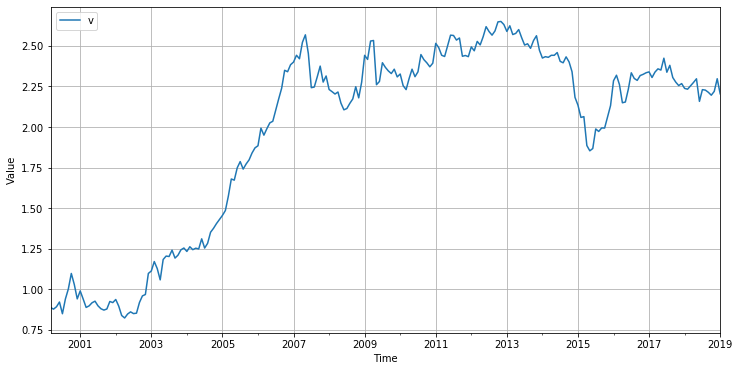

In [19]:
ret = pd.DataFrame(data = port_return, index = end_month.index[2:229])
df1 = ret.cumprod()
df1.plot(figsize=(12,6))
plt.legend('value',loc=2)
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid()

# 2 Calculate the strategy's calendar year returns, i.e., cumulative returns in each year from 2000 to 2019.

In [20]:
# 2000, we start our port from March, so there only 10 months in 2000
# 2019 has only 1 month
# other years all have 12 months

In [21]:
year_ret = ret.resample('Y').prod()
year_ret = year_ret-1

In [22]:
year_ret

,0
1,
2000-12-31,-0.059622
2001-12-31,-0.024292
2002-12-31,0.195714
2003-12-31,0.142878
2004-12-31,0.140041
2005-12-31,0.309129
2006-12-31,0.273906
2007-12-31,-0.029136
2008-12-31,-0.016259


In [23]:
cum_ret = year_ret+1
cum_ret

,0
1,
2000-12-31,0.940378
2001-12-31,0.975708
2002-12-31,1.195714
2003-12-31,1.142878
2004-12-31,1.140041
2005-12-31,1.309129
2006-12-31,1.273906
2007-12-31,0.970864
2008-12-31,0.983741


# 3 Calculate the annualized return, annualized risk, and Sharpe ratio (let's assume risk-free rate of 0) of the strategy.

In [24]:
ann_ret = (ret.cumprod().iloc[-1,])**(12/228) - 1 
ann_ret   # annulized return 

0    0.042481
Name: 2019-01-31 00:00:00, dtype: float64

In [25]:
import math

In [26]:
math.sqrt(12)

3.4641016151377544

In [27]:
std_all = np.array(ret_matrix).std()  
ann_std = std_all*math.sqrt(12)
ann_std     # annulized standard deviation 

0.12000531049968881

In [28]:
sharpe = ann_ret /ann_std
sharpe

0    0.353996
Name: 2019-01-31 00:00:00, dtype: float64

# 4 Identify the maximum drawdown period for this strategy.

In [29]:
df1.iloc[0:,]

,0
1,
2000-03-31,0.886934
2000-04-30,0.877172
2000-05-31,0.891783
2000-06-30,0.920975
2000-07-31,0.848753
...,...
2018-09-30,2.213950
2018-10-31,2.195927
2018-11-30,2.219454


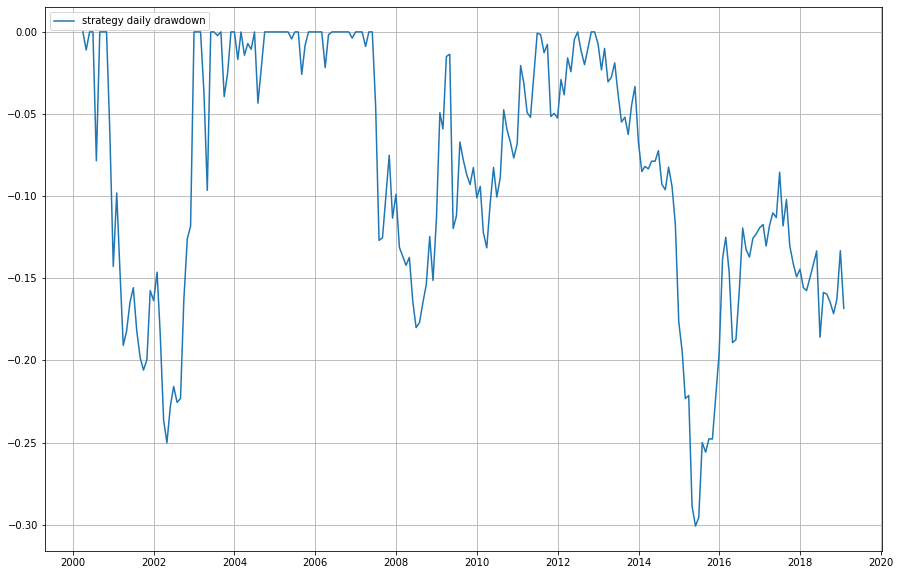

In [30]:
rolling_max = df1.cummax()
daily_drawdown = (df1/rolling_max)-1
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(daily_drawdown,label='strategy daily drawdown')
plt.legend(loc=2)

In [31]:
value = daily_drawdown.cummin()
value.min()
value.iloc[-175:,]

,0
1,
2004-07-31,-0.250138
2004-08-31,-0.250138
2004-09-30,-0.250138
2004-10-31,-0.250138
2004-11-30,-0.250138
...,...
2018-09-30,-0.300852
2018-10-31,-0.300852
2018-11-30,-0.300852


In [32]:
# the maximum drawdown appears on 2004-10-31